In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
df =pd.DataFrame(df)

In [4]:
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


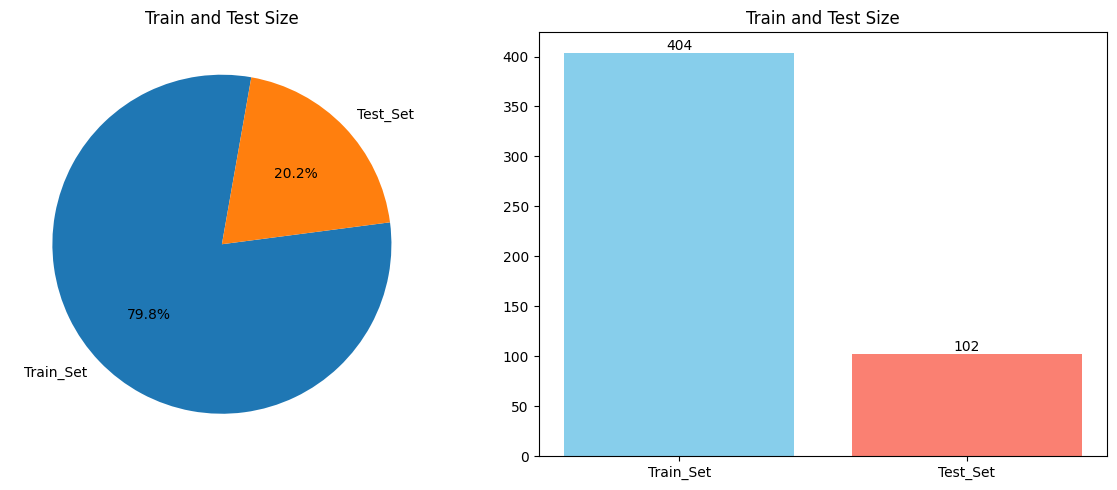

In [6]:
train,test=train_test_split(df, test_size=0.2 ,random_state=42)
size=[len(train), len(test)]
labels =['Train_Set','Test_Set']
colors=['Skyblue' ,'salmon']
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].pie(size,labels= labels , autopct='%1.1f%%' ,startangle=80)

ax[0].set_title("Train and Test Size")


bars = ax[1].bar(labels,size,color=colors)
for bar in bars:
  yval = bar.get_height()
  ax[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval),  ha='center', va='bottom')


ax[1].set_title("Train and Test Size")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Test Set')

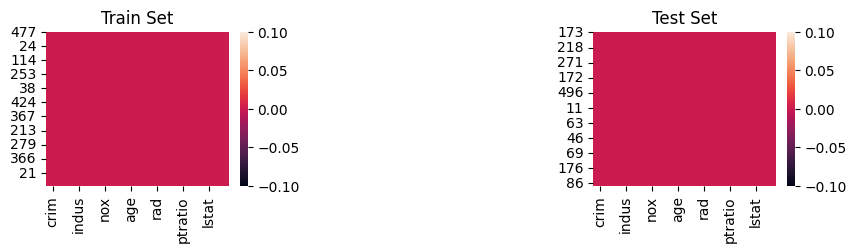

In [7]:
plt.figure(figsize=(10,2))

plt.subplot(1,3,1)
sns.heatmap(train.isnull())
plt.title("Train Set")

plt.subplot(1,3,3)
sns.heatmap(test.isnull())
plt.title("Test Set")

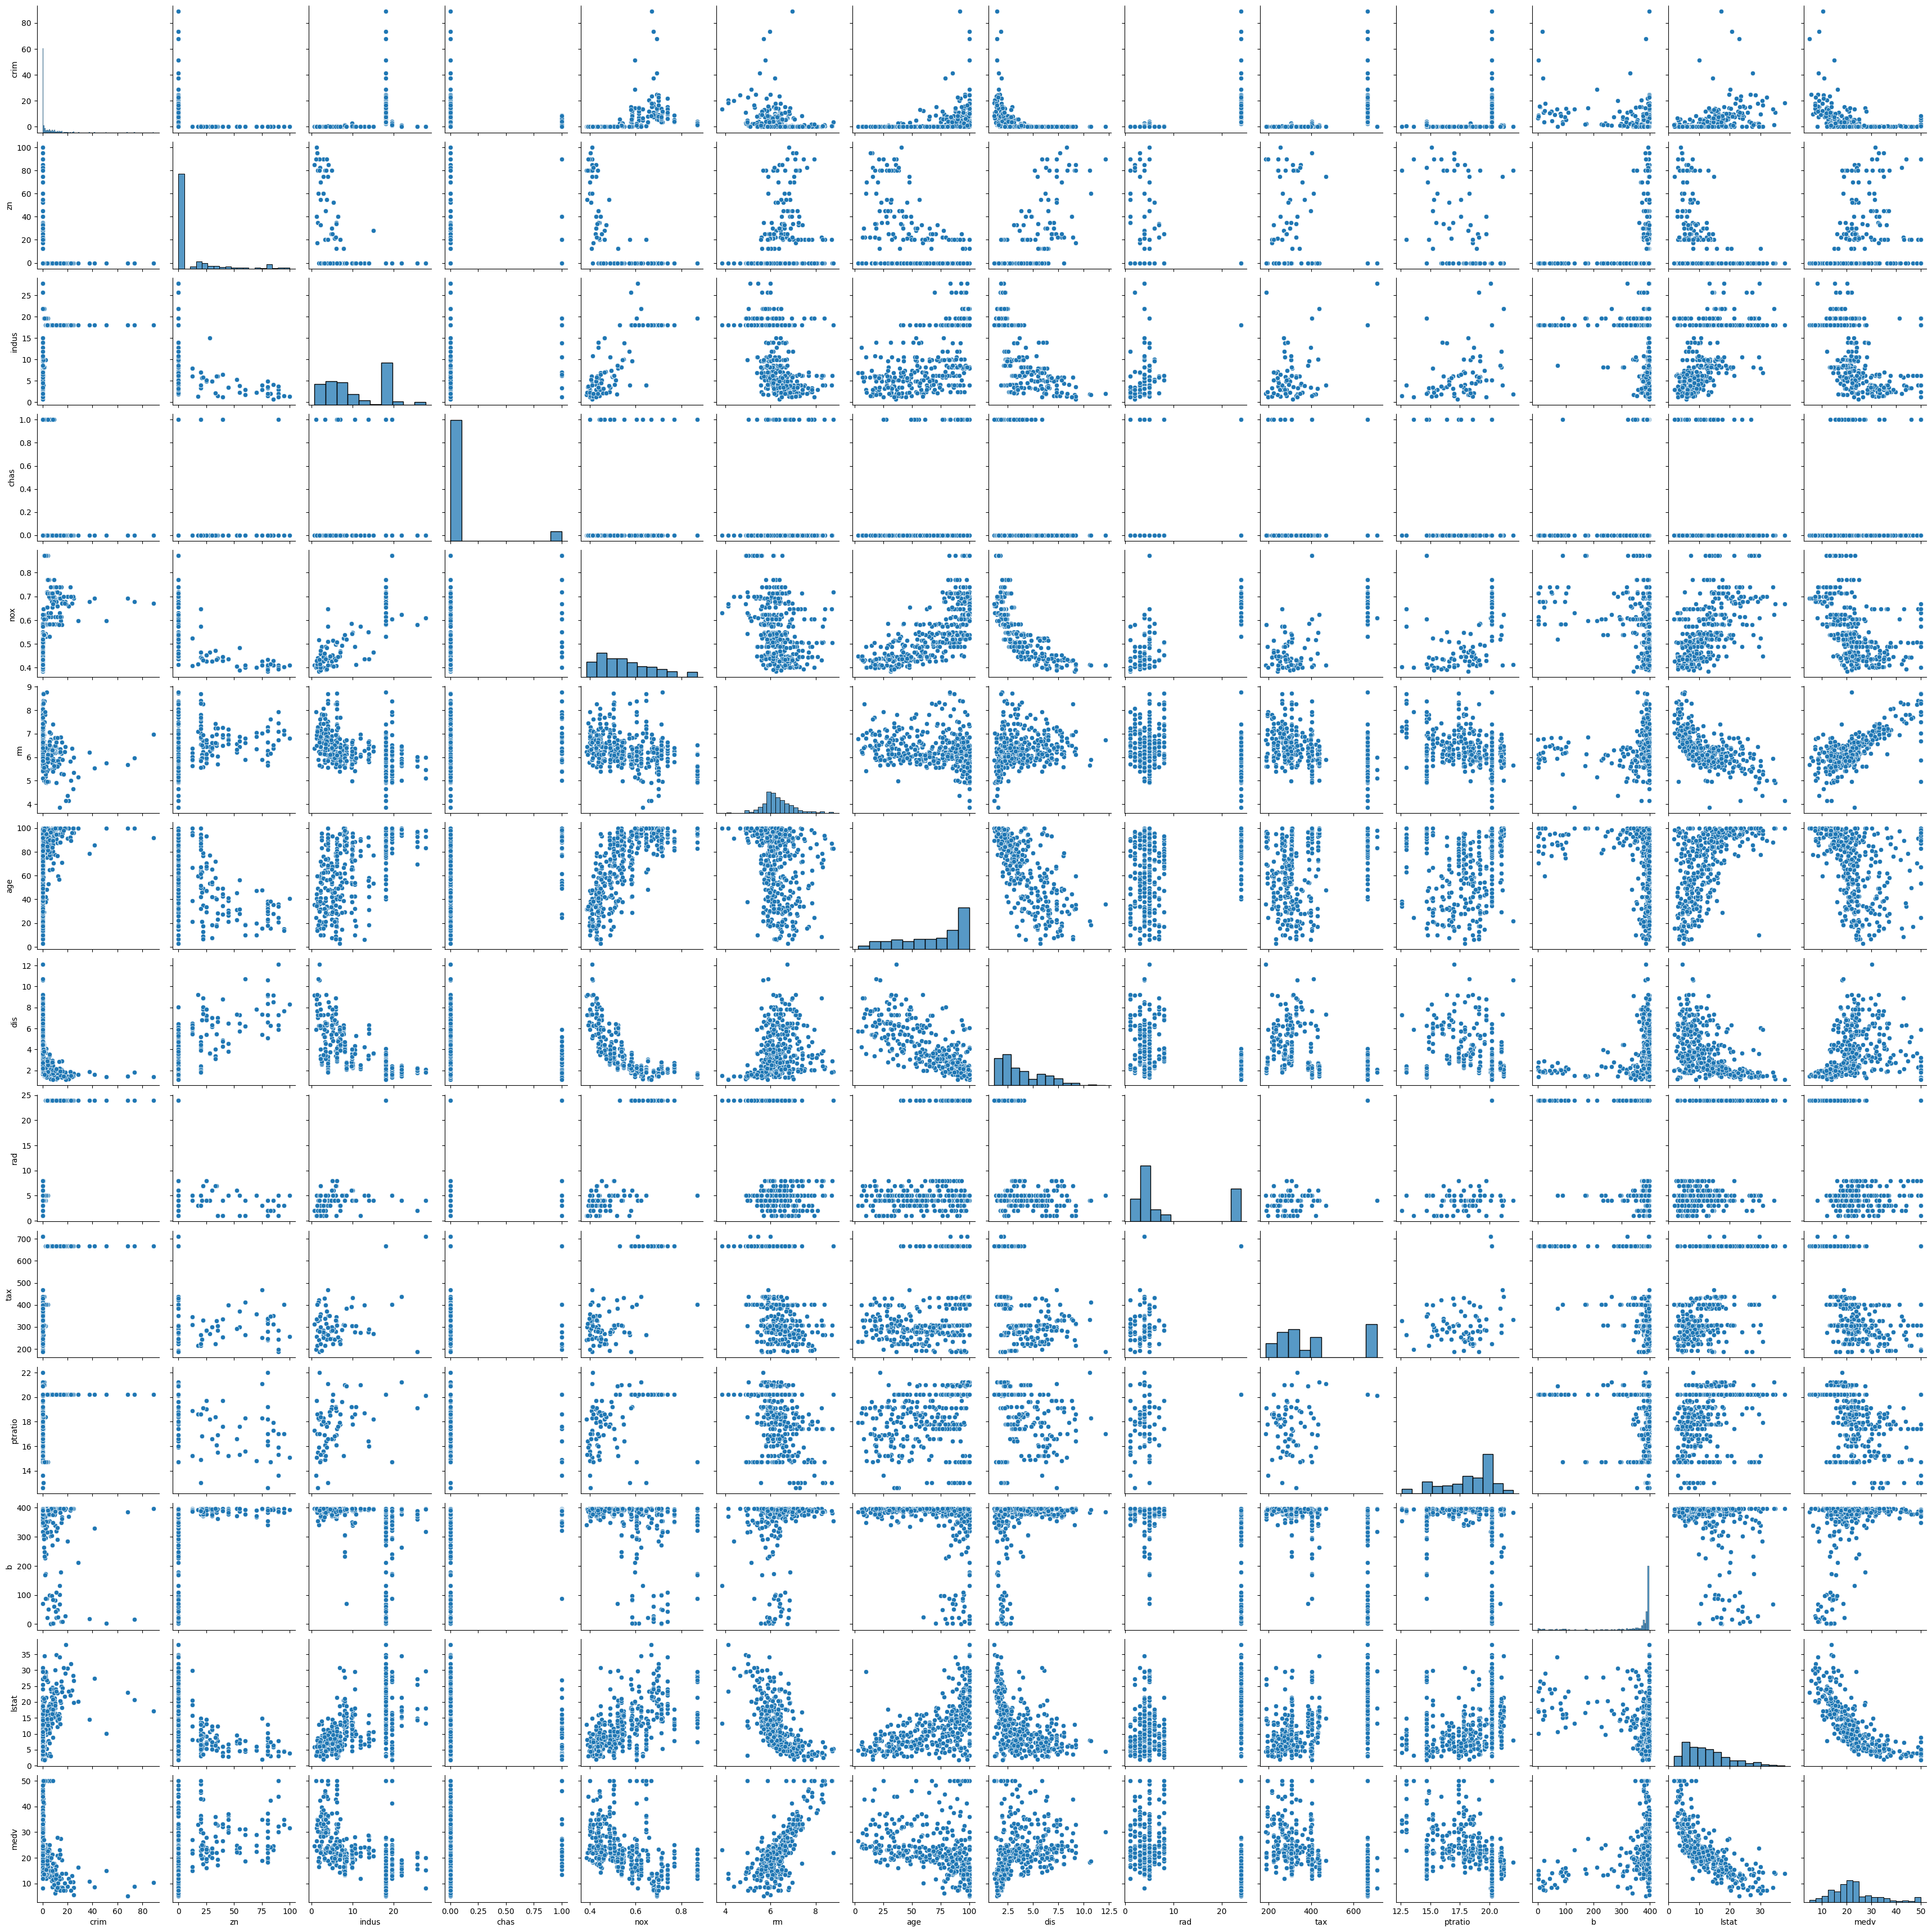

In [8]:
sns.pairplot(train)

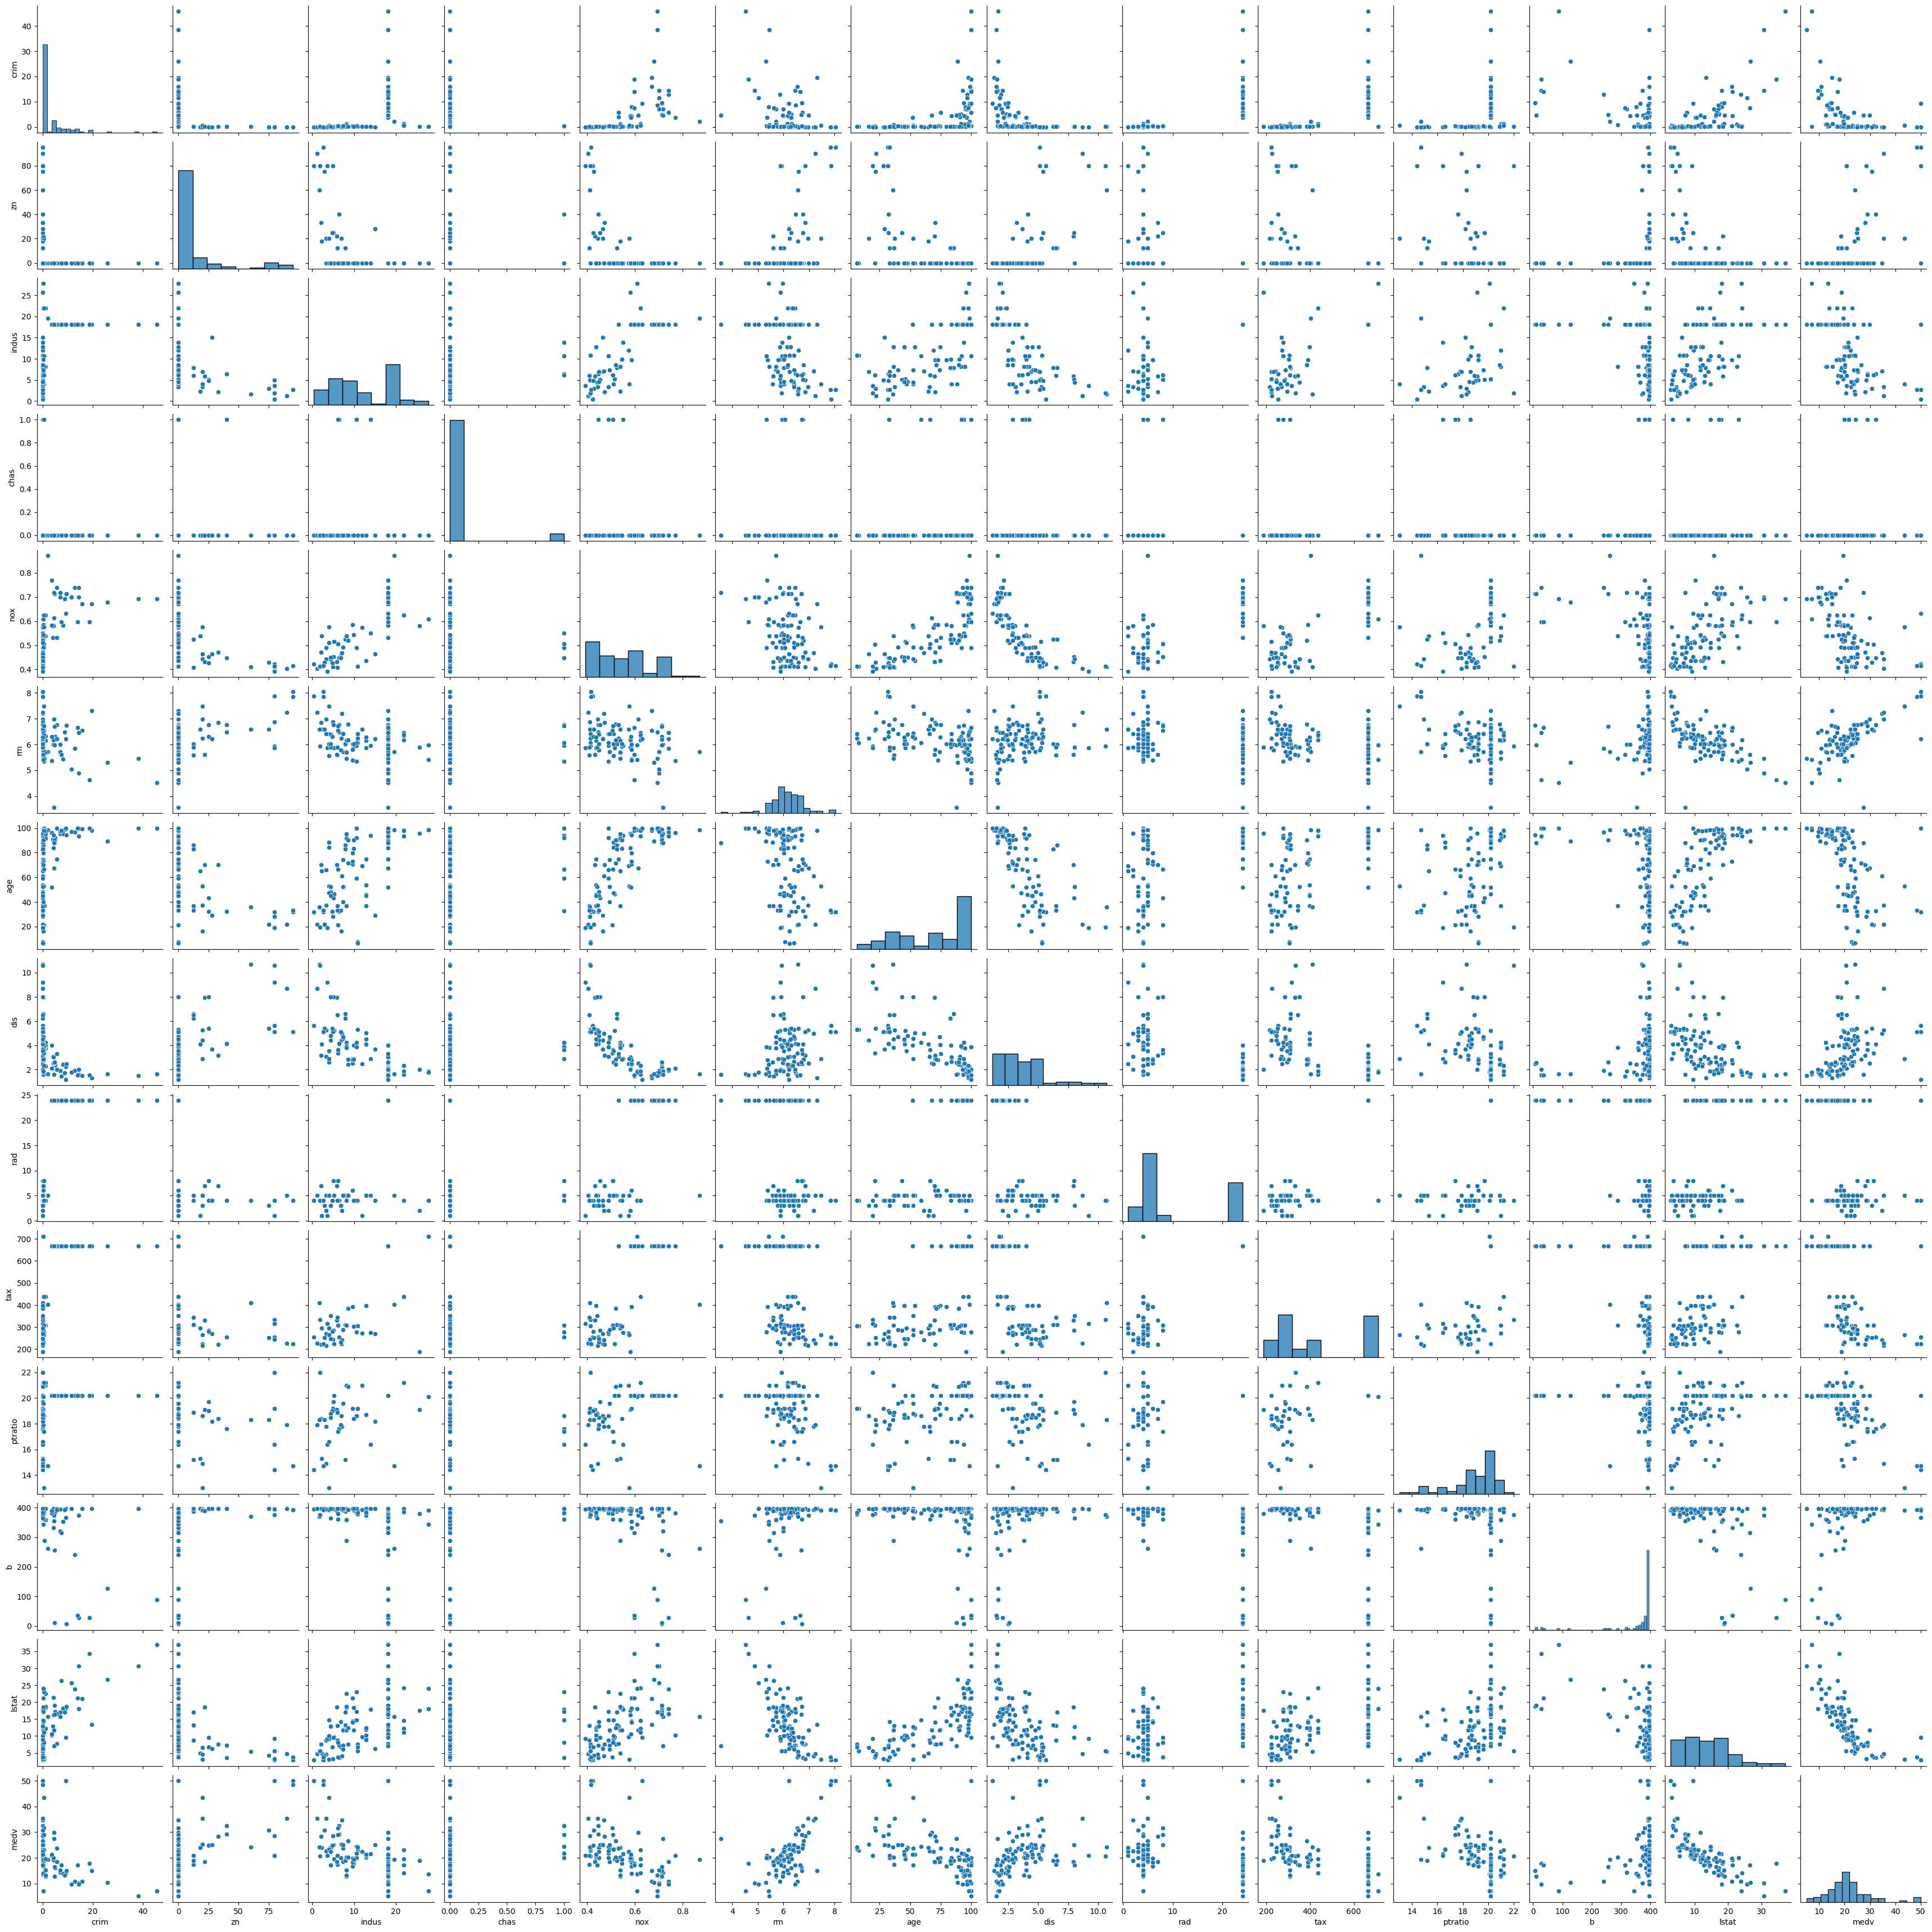

In [9]:
sns.pairplot(test)

In [11]:
columns_except_last = df.columns[:-1].tolist()
print(columns_except_last)


['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


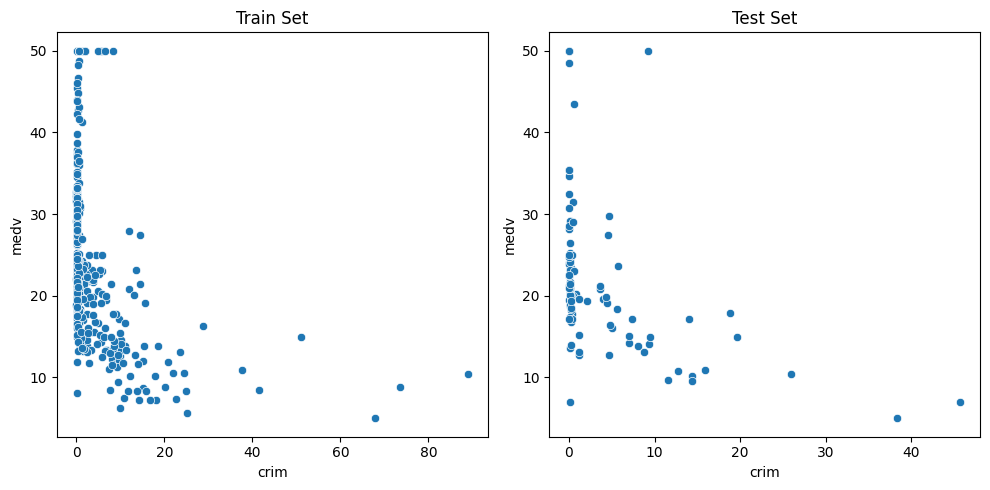

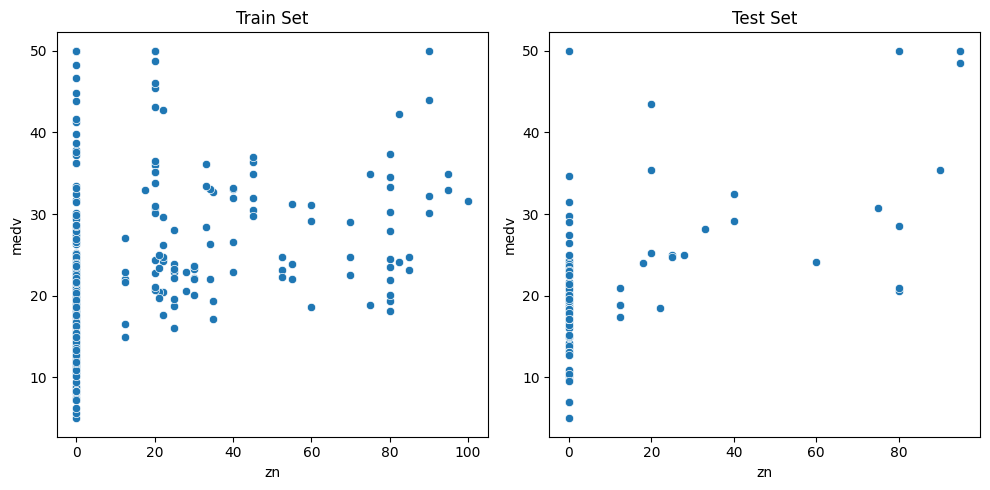

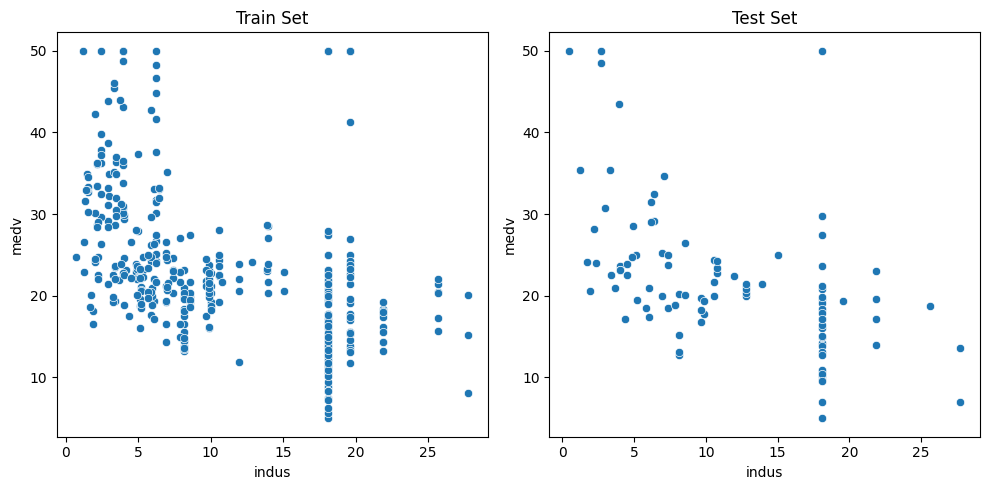

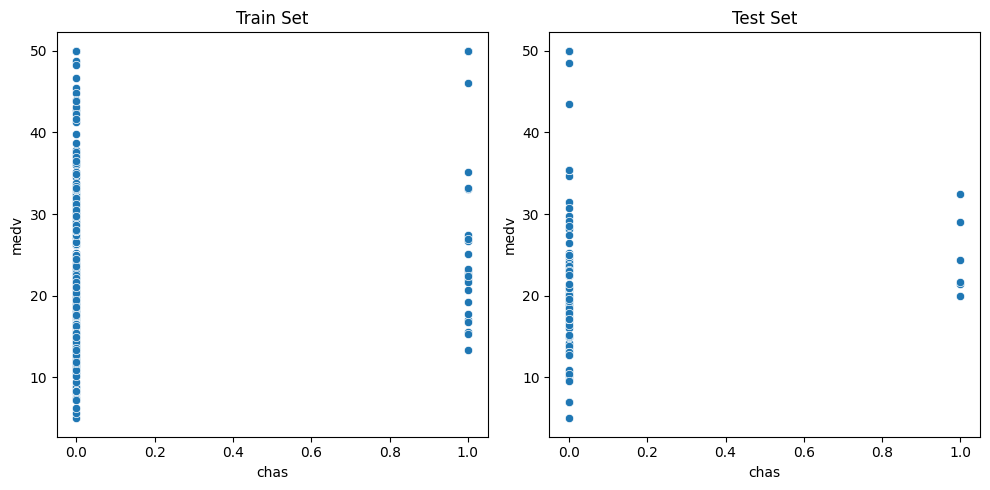

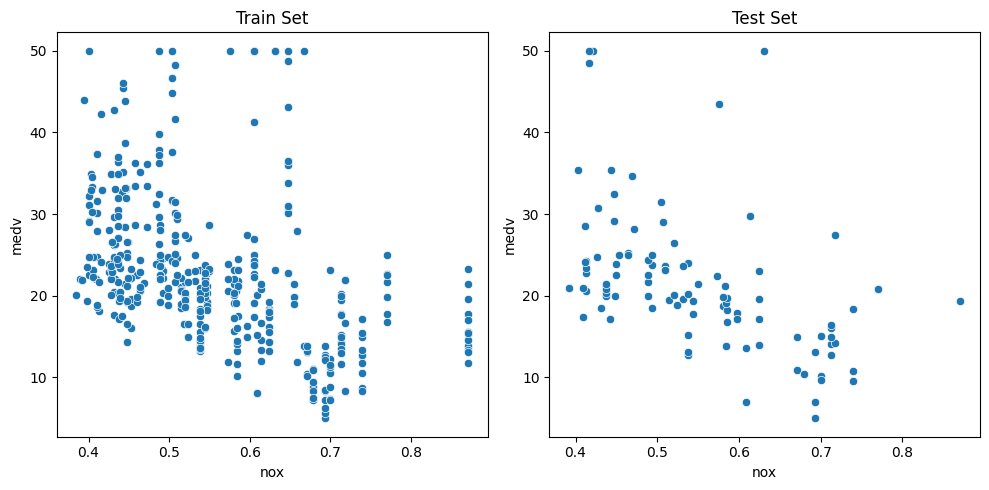

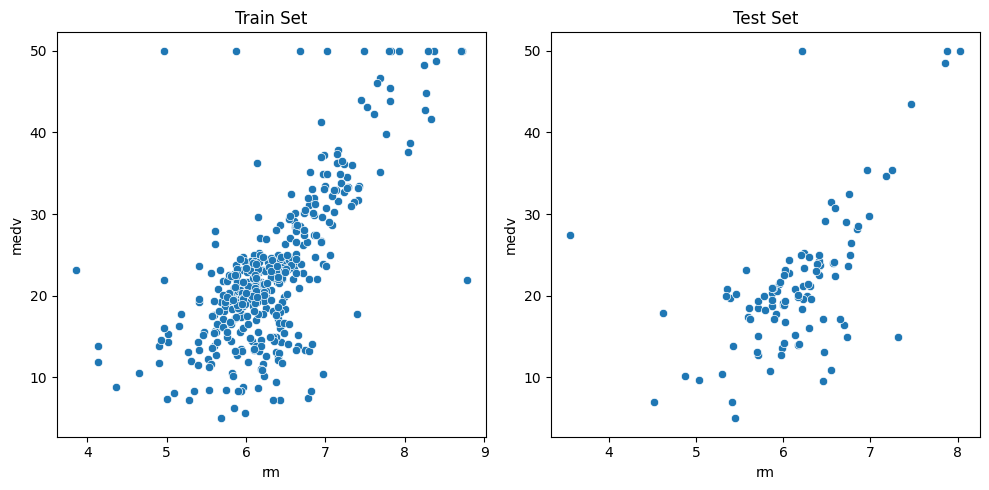

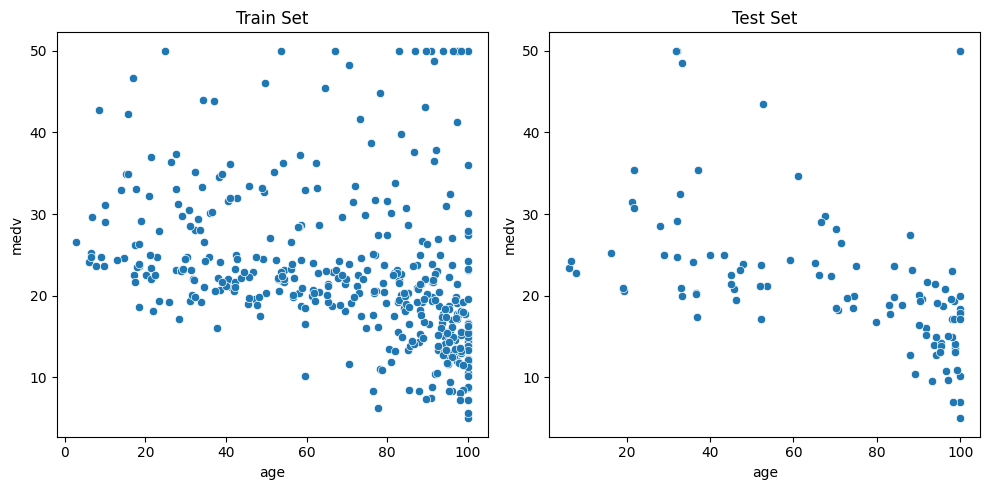

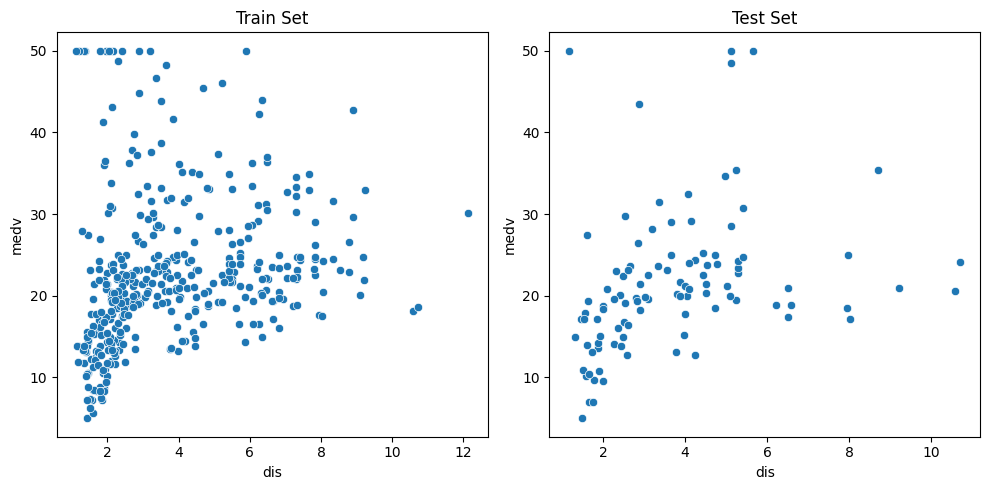

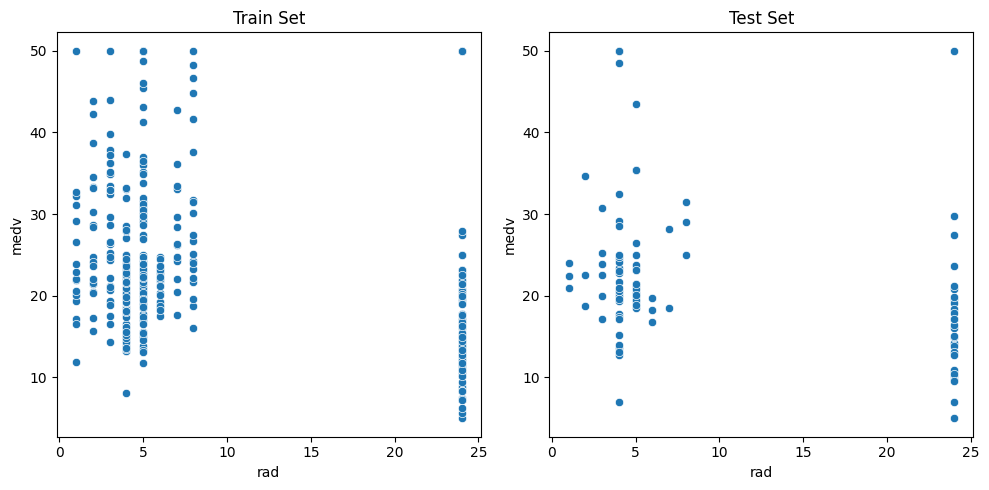

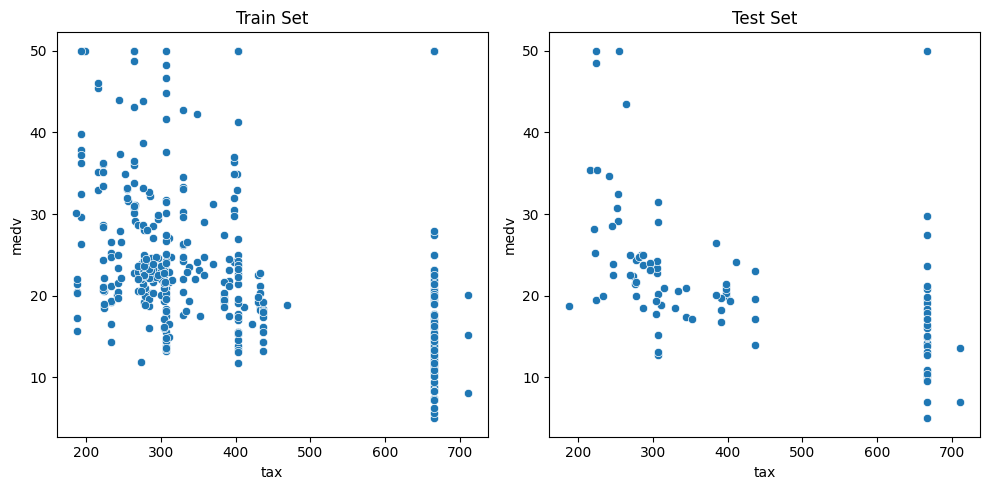

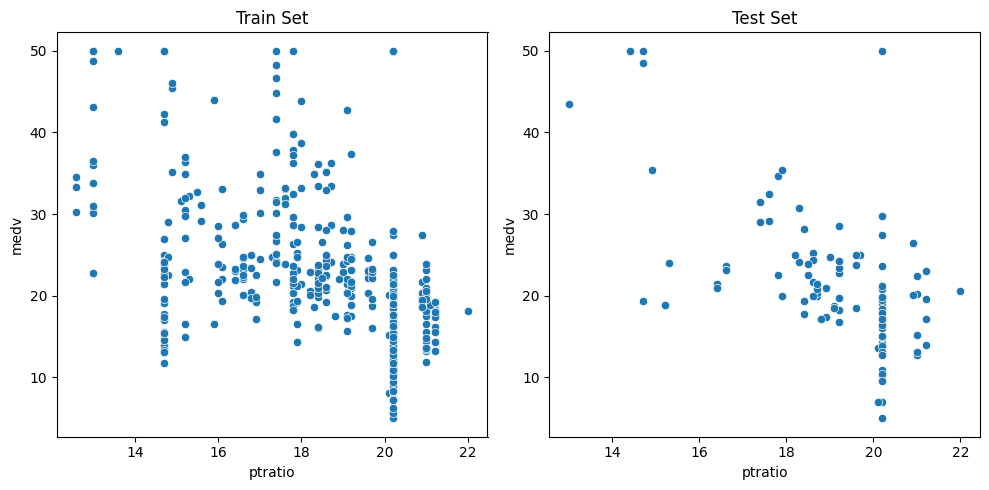

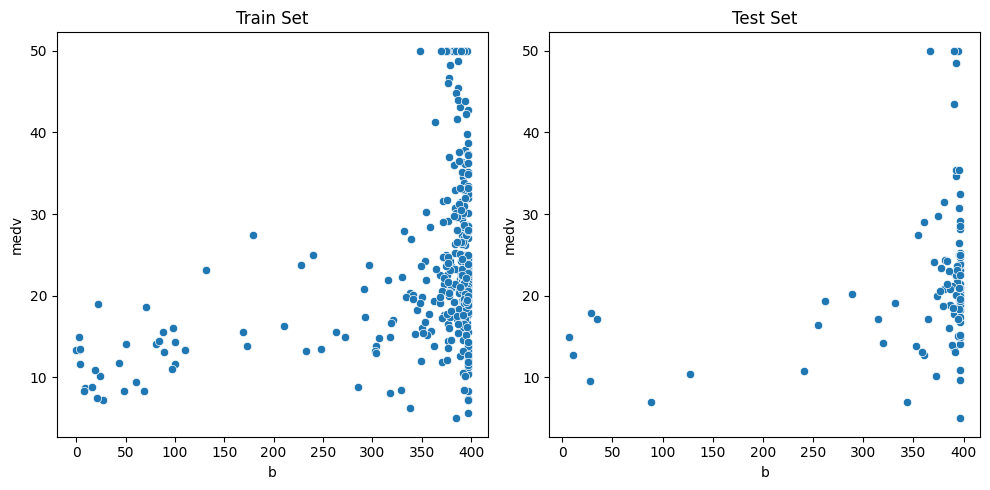

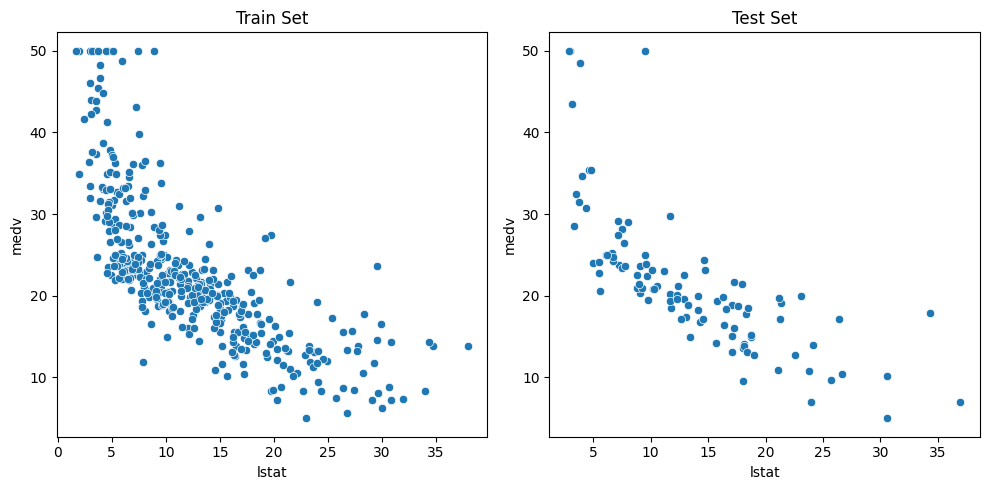

In [12]:
 for i in columns_except_last:
    fig , ax = plt.subplots(1,2,figsize=(10,5))
    sns.scatterplot(x=i,y='medv',data=train,ax=ax[0])
    ax[0].set_title("Train Set")

    sns.scatterplot(x=i,y='medv',data=test,ax=ax[1])
    ax[1].set_title("Test Set")
    plt.tight_layout()
    plt.show()



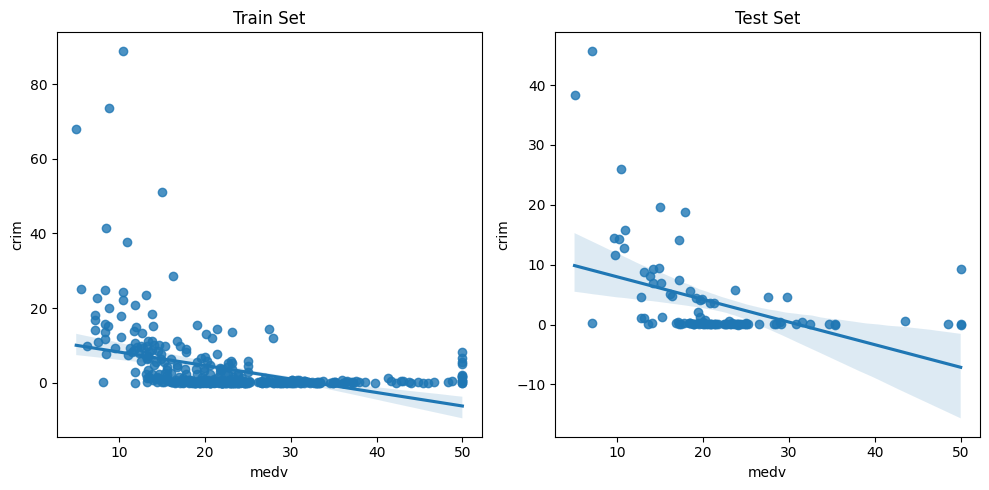

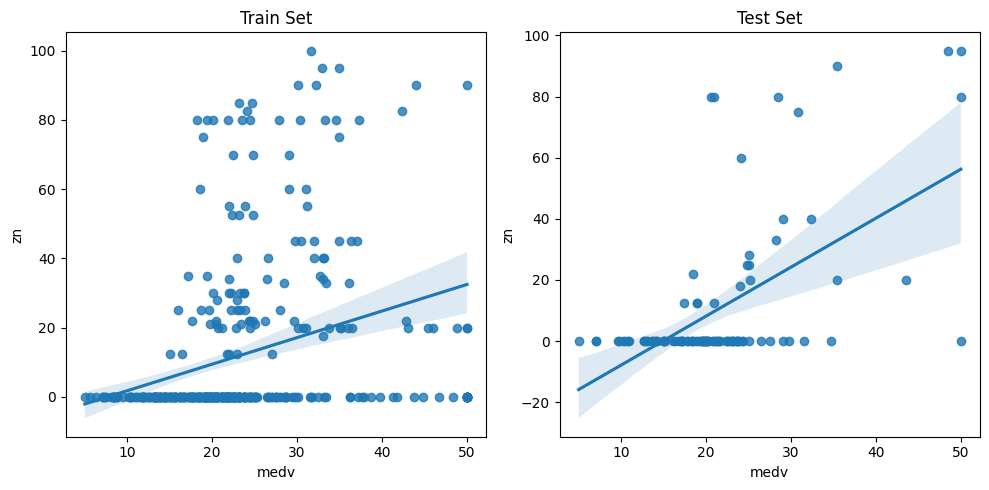

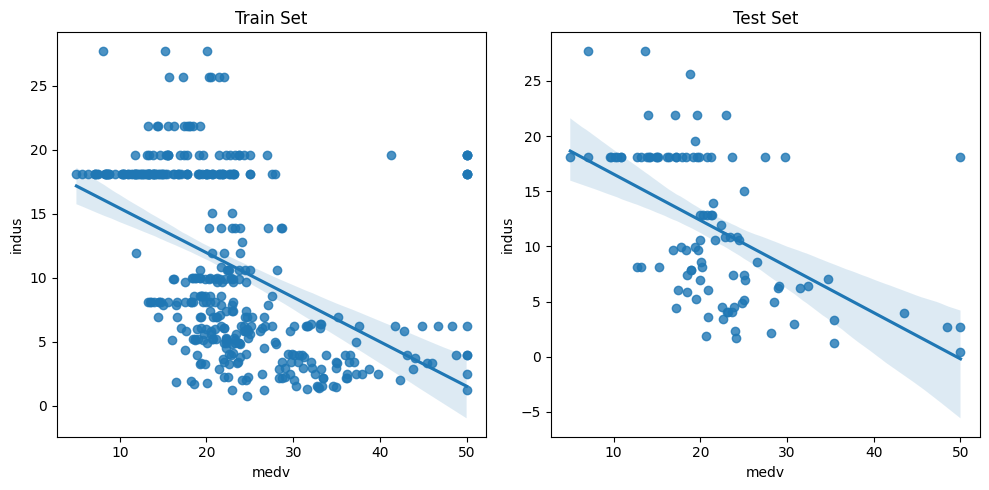

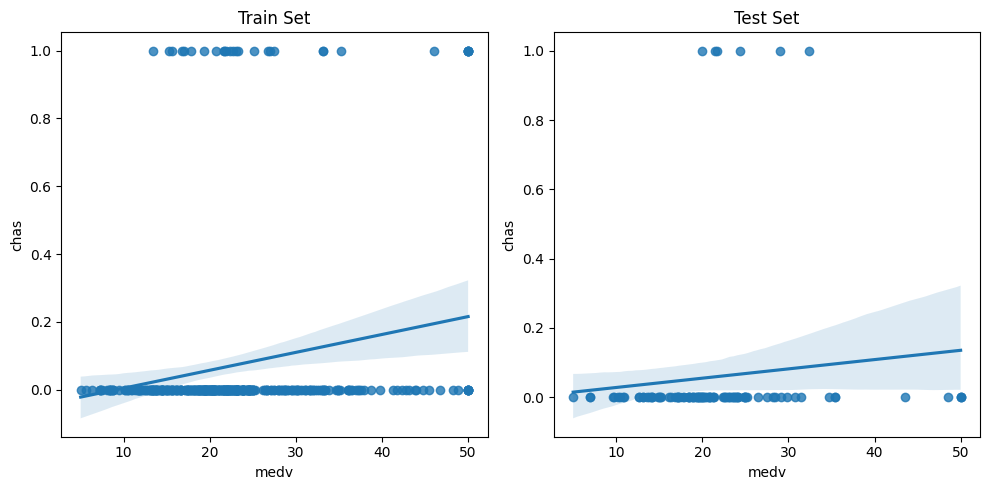

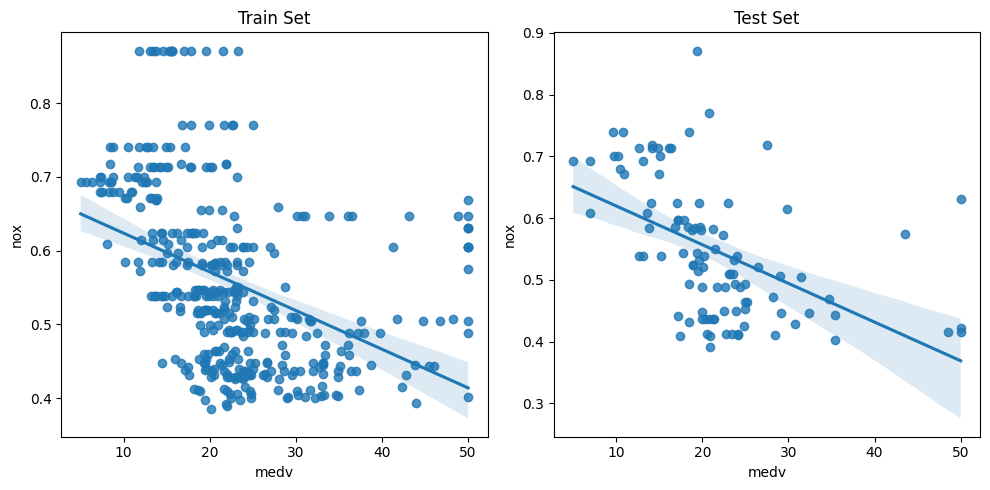

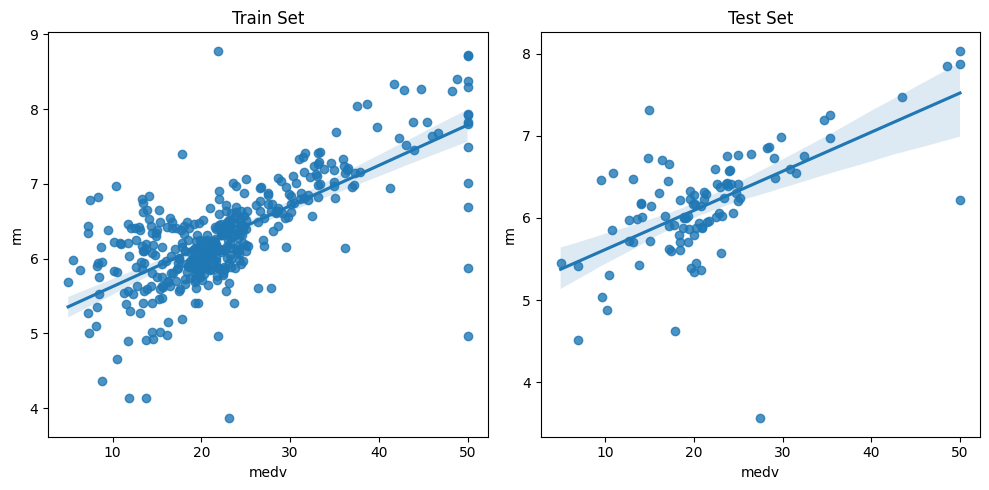

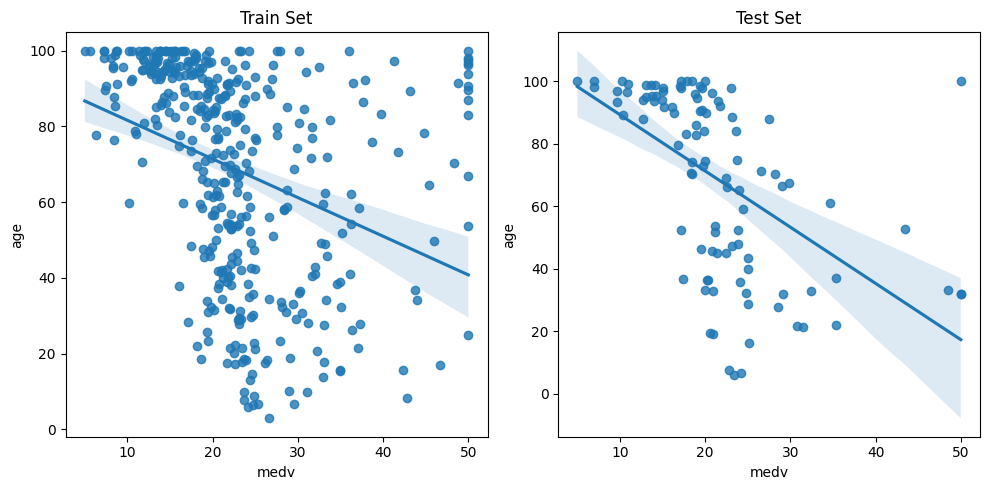

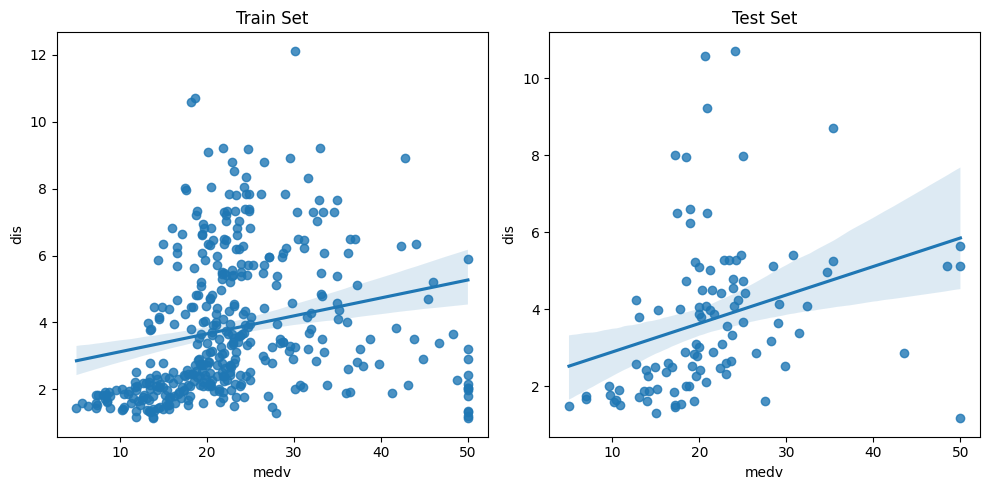

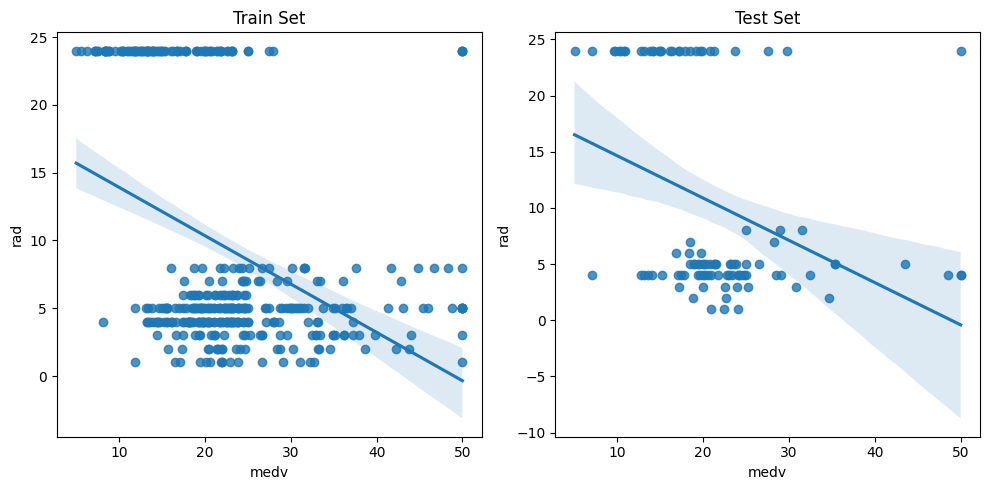

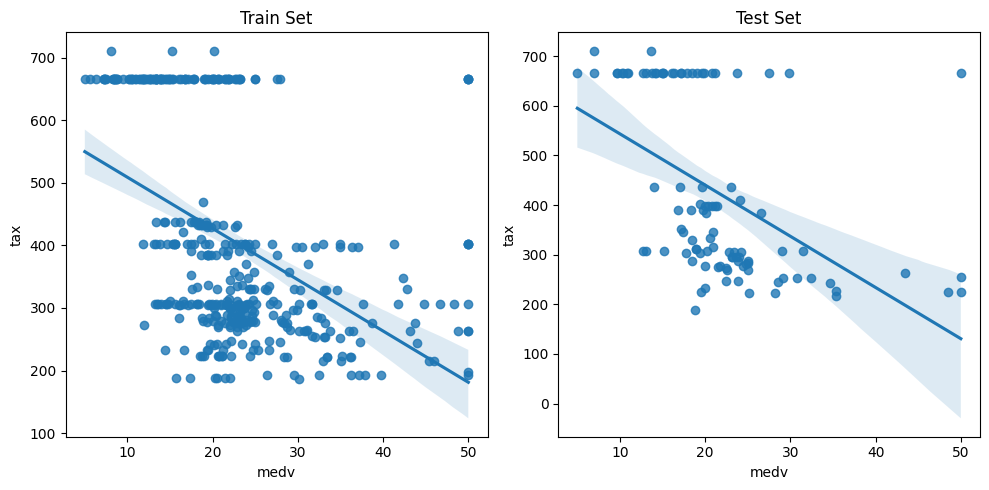

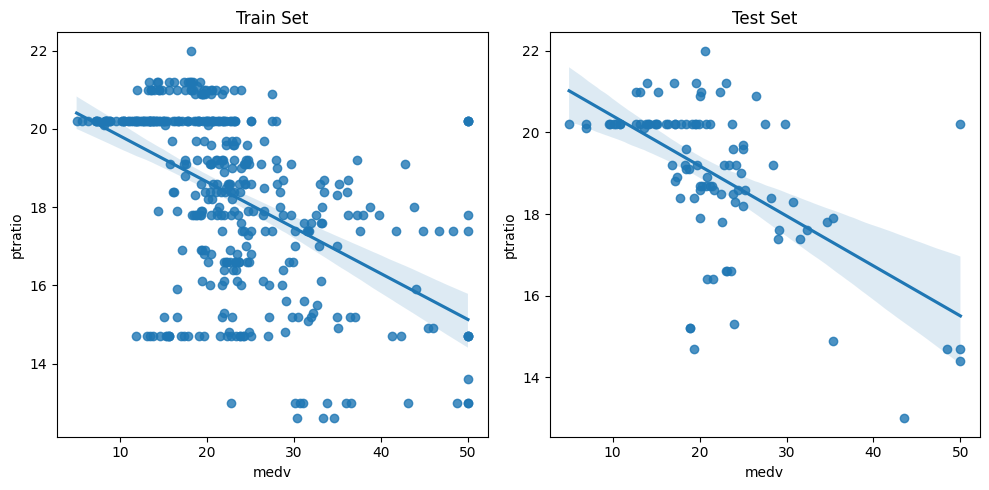

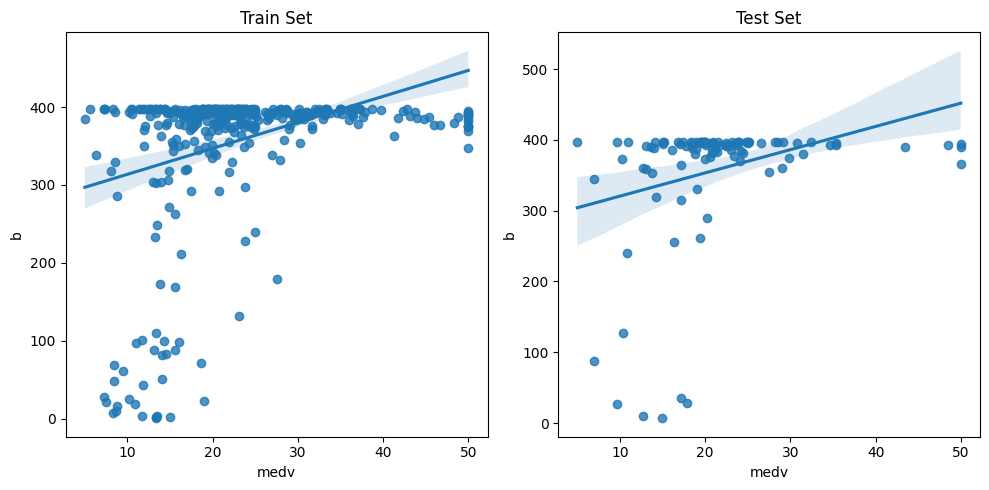

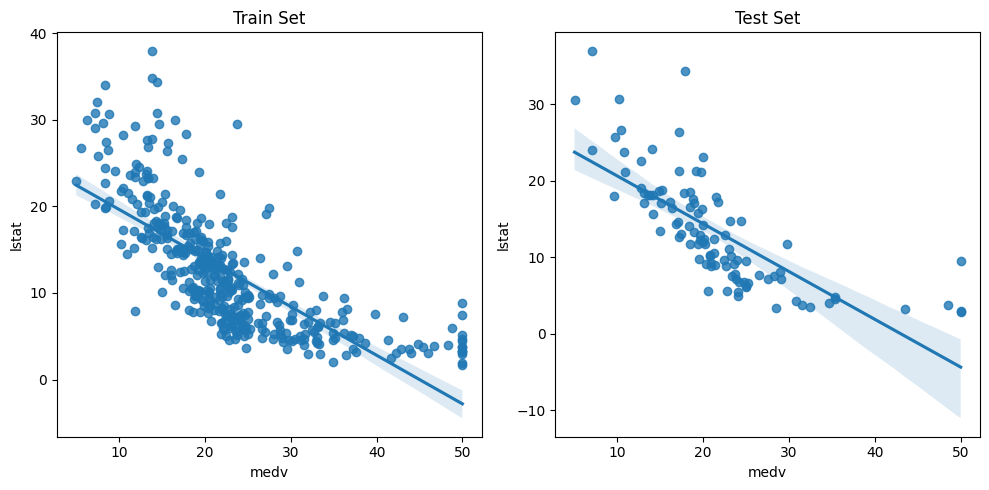

In [13]:
for i in columns_except_last:
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  sns.regplot(x='medv',y=i,data=train,ax=ax[0])
  ax[0].set_title("Train Set")

  sns.regplot(x='medv',y=i,data=test,ax=ax[1])
  ax[1].set_title("Test Set")
  plt.tight_layout()
  plt.show()

Text(0.5, 1.0, 'Test Set')

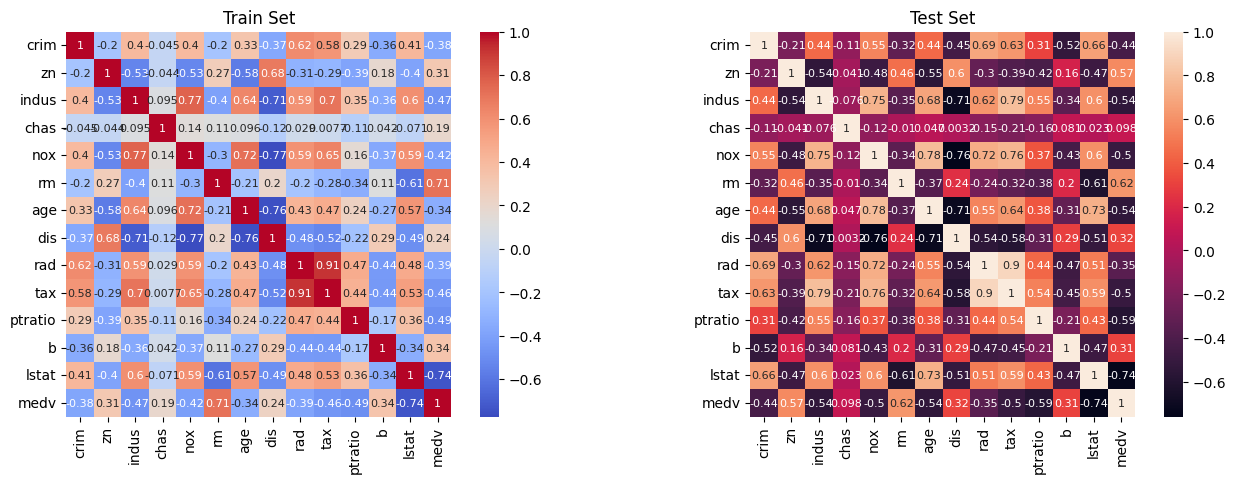

In [14]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.heatmap(train.corr(),annot=True,  cmap='coolwarm', square=True, annot_kws={"size": 8})
plt.title("Train Set")

plt.subplot(1,3,2)
sns.heatmap(test.corr(),annot=True,square=True, annot_kws={"size": 8})
plt.title("Test Set")


In [18]:
train_target = train["medv"]
test_target = test["medv"]

train_data = train.drop("medv", axis=1)
test_data = test.drop("medv", axis=1)

combined_pd = pd.concat([train_data, test_data], axis=0)

sc = StandardScaler()
scaled_data = sc.fit_transform(combined_pd)

combined_scaled_df = pd.DataFrame(scaled_data, index=combined_pd.index, columns=combined_pd.columns)

train_data_transformed = combined_scaled_df.loc[train_data.index, :]
test_data_transformed = combined_scaled_df.loc[test_data.index, :]

train_data = pd.concat([train_data_transformed, train_target], axis=1)
test_data = pd.concat([test_data_transformed, test_target], axis=1)

print(train_data.head())
print(test_data.head())

         crim        zn     indus      chas       nox        rm       age  \
477  1.327804 -0.487722  1.015999 -0.272599  0.512296 -1.397069  1.021481   
15  -0.347506 -0.487722 -0.437258 -0.272599 -0.144217 -0.642000 -0.429390   
332 -0.416484  1.014463 -0.740749 -0.272599 -1.008914 -0.361342 -1.610001   
423  0.399963 -0.487722  1.015999 -0.272599  0.512296 -0.258767  0.587642   
19  -0.336054 -0.487722 -0.437258 -0.272599 -0.144217 -0.794439  0.032897   

          dis       rad       tax   ptratio         b     lstat  medv  
477 -0.805438  1.661245  1.530926  0.806576 -0.078878  1.718101  12.0  
15   0.334449 -0.637962 -0.601276  1.176466  0.427018 -0.586356  19.9  
332  1.352738 -0.982843 -0.619094 -0.719220  0.061137 -0.676067  19.4  
423 -0.842945  1.661245  1.530926  0.806576 -3.883072  1.491020  13.4  
19   0.000693 -0.637962 -0.601276  1.176466  0.375814 -0.192467  18.2  
         crim        zn     indus      chas       nox        rm       age  \
173 -0.409837 -0.487722 -1.0

In [19]:
import pickle
pickle.dump(sc,open('sc.pkl','wb'))

In [20]:
X_train=train_data.drop('medv',axis=1)
y_train=train_data['medv']

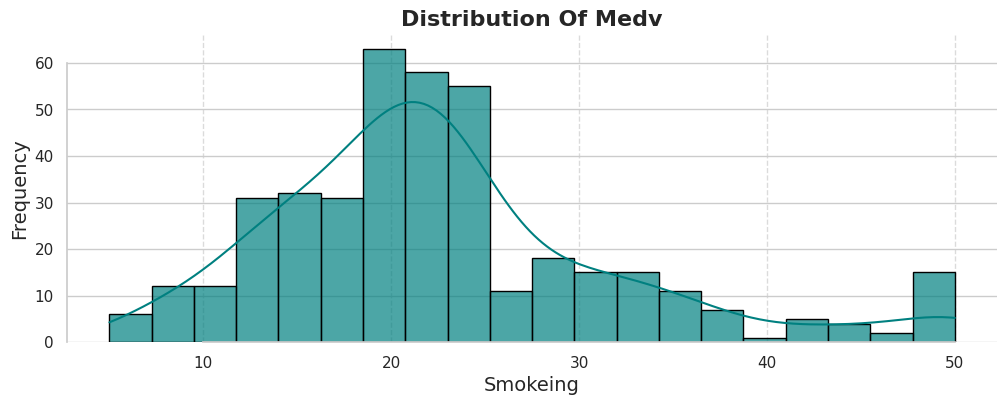

In [21]:
sns.set(style='whitegrid')
sns.set_palette('pastel')

f,ax =plt.subplots(figsize=(12,4))

sns.histplot(y_train,kde=True,color='teal',bins=20,alpha=0.7,edgecolor='black')

ax.set_title("Distribution Of Medv", fontsize=16,weight='bold')
ax.set_xlabel('Smokeing',fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)

ax.xaxis.grid(True ,linestyle="--", alpha=0.7)
sns.despine(trim=True)

plt.show()

In [22]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [41]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from lightgbm import DaskLGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [42]:
X_test = test_data.drop('medv', axis=1)
y_test = test_data['medv']

In [43]:
reg1 = GradientBoostingRegressor(n_estimators=10)
reg2 = LGBMRegressor(n_estimators=10)
reg3 = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
reg4 = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
reg5 = XGBRegressor(n_estimators=10, max_depth=6, eval_metric='logloss')
reg6 = RandomForestRegressor(n_estimators=10)
reg7 = ExtraTreesRegressor(n_estimators=10)
reg8 = DecisionTreeRegressor()
reg9 = CatBoostRegressor(logging_level='Silent', n_estimators=10)

In [44]:
reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)
reg4.fit(X_train,y_train)
reg5.fit(X_train,y_train)
reg6.fit(X_train,y_train)
reg7.fit(X_train,y_train)
reg8.fit(X_train,y_train)
reg9.fit(X_train,y_train)




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.796535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [45]:
pred1=reg1.predict(X_test)
pred2=reg2.predict(X_test)
pred3=reg3.predict(X_test)
pred4=reg4.predict(X_test)
pred5=reg5.predict(X_test)
pred6=reg6.predict(X_test)
pred7=reg7.predict(X_test)
pred8=reg8.predict(X_test)
pred9=reg9.predict(X_test)

In [46]:
rmse1=np.sqrt(mean_squared_error(y_test,pred1))
rmse2=np.sqrt(mean_squared_error(y_test,pred2))
rmse3=np.sqrt(mean_squared_error(y_test,pred3))
rmse4=np.sqrt(mean_squared_error(y_test,pred4))
rmse5=np.sqrt(mean_squared_error(y_test,pred5))
rmse6=np.sqrt(mean_squared_error(y_test,pred6))
rmse7=np.sqrt(mean_squared_error(y_test,pred7))
rmse8=np.sqrt(mean_squared_error(y_test,pred8))
rmse9=np.sqrt(mean_squared_error(y_test,pred9))

r2_1=r2_score(y_test,pred1)
r2_2=r2_score(y_test,pred2)
r2_3=r2_score(y_test,pred3)
r2_4=r2_score(y_test,pred4)
r2_5=r2_score(y_test,pred5)
r2_6=r2_score(y_test,pred6)
r2_7=r2_score(y_test,pred7)
r2_8=r2_score(y_test,pred8)
r2_9=r2_score(y_test,pred9)

In [51]:
rmse_value= []
r2_value = []
regressor_name = []

regressor = [reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9]

for reg in regressor:
  reg_name=reg.__class__.__name__
  y_pred=reg.predict(X_test)
  rmse=np.sqrt(mean_squared_error(y_test,y_pred))
  r2=r2_score(y_test,y_pred)

  rmse_value.append(rmse)
  r2_value.append(r2)
  regressor_name.append(reg_name)

rmse_sorted_value=np.argsort(rmse_value)
rmse_value_sorted=np.array(rmse_value)[rmse_sorted_value]
regressor_names_rmse_sorted=np.array(regressor_name)[rmse_sorted_value]


r2_sorted_value=np.argsort(r2_value)[::-1]
r2_values_sorted=np.array(r2_value)[r2_sorted_value]
regressor_names_r2_sorted=np.array(regressor_name)[r2_sorted_value]

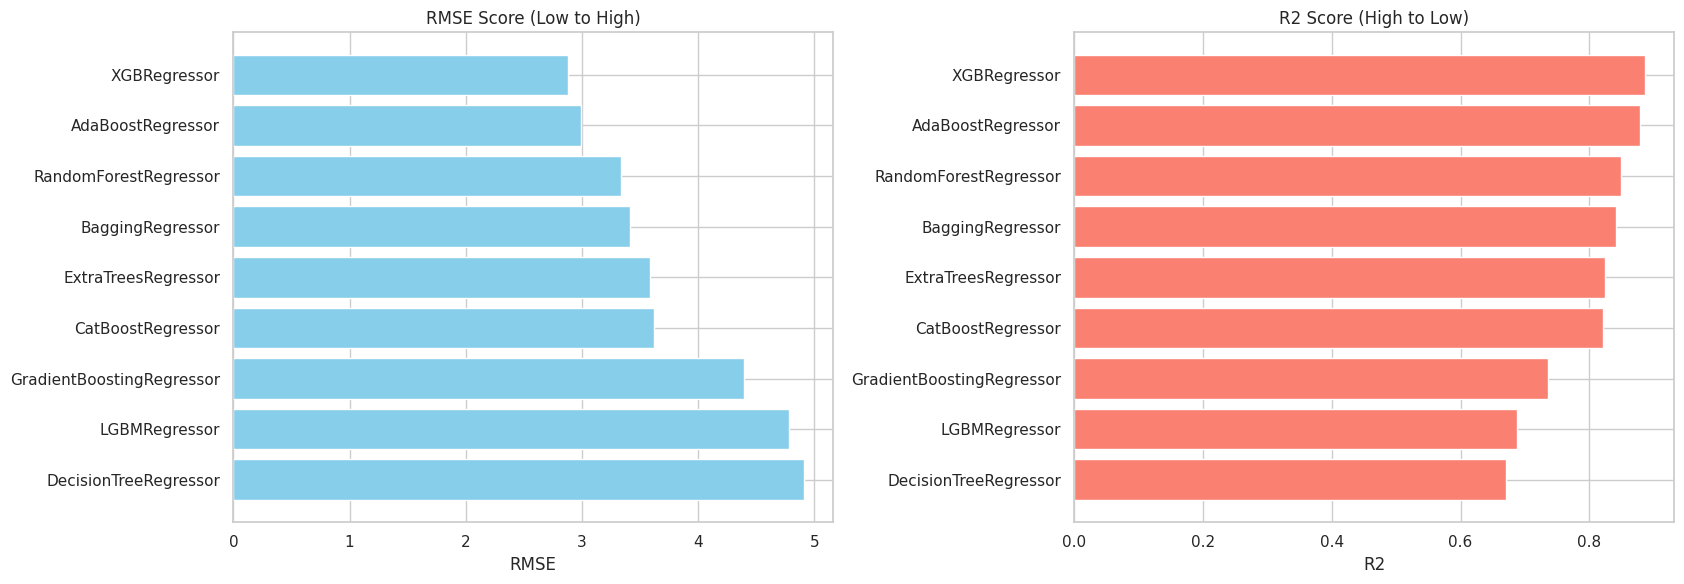

In [52]:
fig,ax=plt.subplots(1,2,figsize=(17,6))

ax[0].barh(regressor_names_rmse_sorted,rmse_value_sorted,color='skyblue')
ax[0].set_title('RMSE Score (Low to High)')
ax[0].set_xlabel('RMSE')
ax[0].invert_yaxis()

ax[1].barh(regressor_names_r2_sorted,r2_values_sorted,color='salmon')
ax[1].set_title('R2 Score (High to Low)')
ax[1].set_xlabel('R2')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [61]:
pickle.dump(reg5,open('XGB.pkl','wb'))